In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import pydicom
import glob
import os
import random

In [2]:
df_detail = pd.read_csv('data/stage_1_detailed_class_info.csv')

In [3]:
df_detail.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [4]:
# load and shuffle filenames
folder = 'data/stage_1_train_images'
filenames = os.listdir(folder)
SEED = 42
random.seed(SEED)
random.shuffle(filenames)
# split into train and validation filenames
# n_valid_samples = 1284
n_valid_samples = 2568
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]

In [5]:
valid_filenames[:5]

['ec416f17-0ce2-4846-851e-cc5c2a6a49bb.dcm',
 'f2fb646b-cedb-4841-8c6a-0b969e07ff52.dcm',
 '5bfa4ba1-9ea6-42c5-b44f-1a58dfe648bf.dcm',
 'b3bff0f2-2ffa-4ea4-8ca4-57cb08980ad2.dcm',
 'cd579d2f-d3b5-46ea-a91c-ec5ddd59665f.dcm']

In [10]:
df_detail.loc[:, 'patientId'] = df_detail['patientId'] + '.dcm'

In [12]:
df_valid = df_detail[df_detail['patientId'].isin(valid_filenames)]

In [14]:
df_valid.shape

(2875, 2)

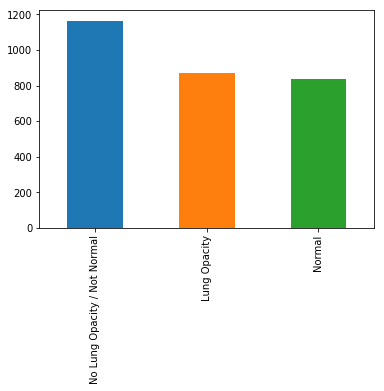

In [13]:
df_valid['class'].value_counts().plot.bar()

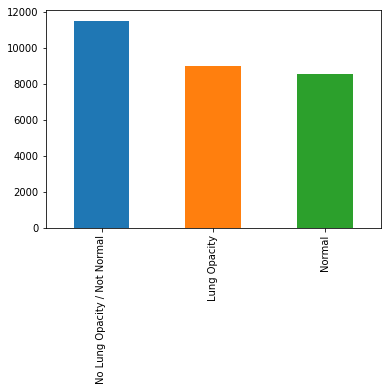

In [15]:
df_detail['class'].value_counts().plot.bar()

In [16]:
train_dicom_dir = 'data/stage_1_train_images'
test_dicom_dir = 'data/stage_1_test_images'

In [17]:
def get_dicom_fps(dicom_dir):
    dicom_fps = glob.glob(dicom_dir+'/'+'*.dcm')
    return list(set(dicom_fps))

def parse_dataset(dicom_dir, anns): 
    image_fps = get_dicom_fps(dicom_dir)
    image_annotations = {fp: [] for fp in image_fps}
    for index, row in anns.iterrows(): 
        fp = os.path.join(dicom_dir, row['patientId']+'.dcm')
        image_annotations[fp].append(row)
    return image_fps, image_annotations 

In [18]:
train_labels = pd.read_csv('data/stage_1_train_labels.csv')

In [19]:
train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [20]:
df_detail = df_detail.merge(train_labels, on = 'patientId', how = 'left')

In [21]:
df_detail.head()

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1


In [22]:
train_image_fps, train_image_annotations = parse_dataset(train_dicom_dir, train_labels)

In [23]:
train_image_fps[:5]

['data/stage_1_train_images/19b7a326-bfcf-4ba1-818a-62faec88e01f.dcm',
 'data/stage_1_train_images/6e0d9ed7-09d6-4089-b214-2f6c0f45913b.dcm',
 'data/stage_1_train_images/e5ffd138-39af-4e75-a79f-3531f2ff1b9e.dcm',
 'data/stage_1_train_images/fa1aa629-3155-4f4c-896d-6c330b1433ae.dcm',
 'data/stage_1_train_images/af188f6b-66f1-46d7-a211-8a8310278e0c.dcm']

In [24]:
train_image_fps.sort()

In [25]:
df = df_detail[df_detail['Target'] == 1].reset_index()

df = df.drop('index', axis = 1)

In [26]:
df.head(10)

,patientId,class,x,y,width,height,Target
0,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
1,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
2,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
3,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
4,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1
5,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1
6,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1
7,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1
8,00aecb01-a116-45a2-956c-08d2fa55433f,Lung Opacity,288.0,322.0,94.0,135.0,1
9,00aecb01-a116-45a2-956c-08d2fa55433f,Lung Opacity,547.0,299.0,119.0,165.0,1


In [27]:
def draw(data):
    """
    Method to draw single patient with bounding box(es) if present 

    """
    # --- Open DICOM file
    d = pydicom.read_file(data['dicom'])
    im = d.pixel_array

    # --- Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)

    # --- Add boxes with random color if present
    for box in data['boxes']:
        rgb = np.floor(np.random.rand(3) * 256).astype('int')
        im = overlay_box(im=im, box=box, rgb=rgb, stroke=6)

    fig,ax = plt.subplots(1, figsize=(10,10))
    plt.imshow(im[:, :], cmap='gray')
    plt.axis('on')

def overlay_box(im, box, rgb, stroke=1):
    """
    Method to overlay single box on image

    """
    # --- Convert coordinates to integers
    box = [int(b) for b in box]
    
    # --- Extract coordinates
    y1, x1, height, width = box
    y2 = y1 + height
    x2 = x1 + width

    im[y1:y1 + stroke, x1:x2] = rgb
    im[y2:y2 + stroke, x1:x2] = rgb
    im[y1:y2, x1:x1 + stroke] = rgb
    im[y1:y2, x2:x2 + stroke] = rgb

    return im

In [32]:
def parse_data(df):
    """
    Method to read a CSV file (Pandas dataframe) and parse the 
    data into the following nested dictionary:

      parsed = {
        
        'patientId-00': {
            'dicom': path/to/dicom/file,
            'label': either 0 or 1 for normal or pnuemonia, 
            'boxes': list of box(es)
        },
        'patientId-01': {
            'dicom': path/to/dicom/file,
            'label': either 0 or 1 for normal or pnuemonia, 
            'boxes': list of box(es)
        }, ...

      }

    """
    # --- Define lambda to extract coords in list [y, x, height, width]
    extract_box = lambda row: [row['y'], row['x'], row['height'], row['width']]

    parsed = {}
    for n, row in df.iterrows():
        # --- Initialize patient entry into parsed 
        pid = row['patientId']
        if pid not in parsed:
            parsed[pid] = {
                'dicom': 'data/stage_1_train_images/%s.dcm' % pid,
                'label': row['Target'],
                'boxes': []}

        # --- Add box if opacity is present
        if parsed[pid]['label'] == 1:
            parsed[pid]['boxes'].append(extract_box(row))

    return parsed

In [33]:
parsed = parse_data(df)

In [34]:
parsed

{'00436515-870c-4b36-a041-de91049b9ab4': {'dicom': 'data/stage_1_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm',
  'label': 1,
  'boxes': [[152.0, 264.0, 379.0, 213.0],
   [152.0, 562.0, 453.0, 256.0],
   [152.0, 264.0, 379.0, 213.0],
   [152.0, 562.0, 453.0, 256.0]]},
 '00704310-78a8-4b38-8475-49f4573b2dbb': {'dicom': 'data/stage_1_train_images/00704310-78a8-4b38-8475-49f4573b2dbb.dcm',
  'label': 1,
  'boxes': [[577.0, 323.0, 104.0, 160.0],
   [575.0, 695.0, 137.0, 162.0],
   [577.0, 323.0, 104.0, 160.0],
   [575.0, 695.0, 137.0, 162.0]]},
 '00aecb01-a116-45a2-956c-08d2fa55433f': {'dicom': 'data/stage_1_train_images/00aecb01-a116-45a2-956c-08d2fa55433f.dcm',
  'label': 1,
  'boxes': [[322.0, 288.0, 135.0, 94.0],
   [299.0, 547.0, 165.0, 119.0],
   [322.0, 288.0, 135.0, 94.0],
   [299.0, 547.0, 165.0, 119.0]]},
 '00c0b293-48e7-4e16-ac76-9269ba535a62': {'dicom': 'data/stage_1_train_images/00c0b293-48e7-4e16-ac76-9269ba535a62.dcm',
  'label': 1,
  'boxes': [[544.0, 306.0, 244.0,

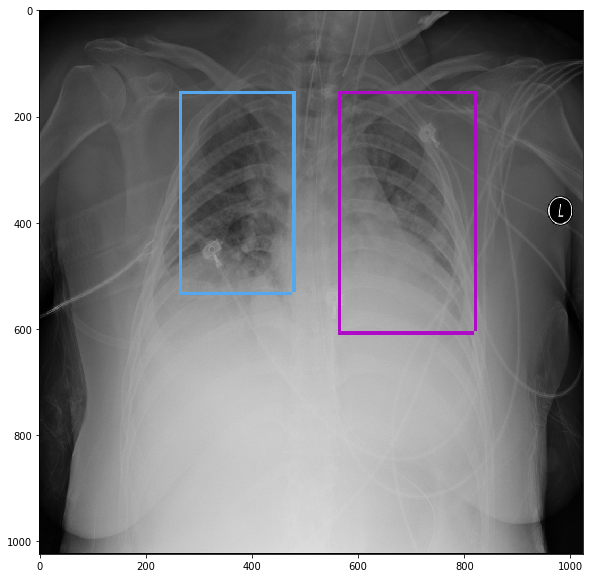

In [35]:
draw(parsed['00436515-870c-4b36-a041-de91049b9ab4'])

In [36]:
parsed_not_normal = parse_data(df_detail[df_detail['class'] == 'No Lung Opacity / Not Normal'])

In [37]:
parsed_not_normal

{'0004cfab-14fd-4e49-80ba-63a80b6bddd6': {'dicom': 'data/stage_1_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm',
  'label': 0,
  'boxes': []},
 '00313ee0-9eaa-42f4-b0ab-c148ed3241cd': {'dicom': 'data/stage_1_train_images/00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm',
  'label': 0,
  'boxes': []},
 '00322d4d-1c29-4943-afc9-b6754be640eb': {'dicom': 'data/stage_1_train_images/00322d4d-1c29-4943-afc9-b6754be640eb.dcm',
  'label': 0,
  'boxes': []},
 '00569f44-917d-4c86-a842-81832af98c30': {'dicom': 'data/stage_1_train_images/00569f44-917d-4c86-a842-81832af98c30.dcm',
  'label': 0,
  'boxes': []},
 '006cec2e-6ce2-4549-bffa-eadfcd1e9970': {'dicom': 'data/stage_1_train_images/006cec2e-6ce2-4549-bffa-eadfcd1e9970.dcm',
  'label': 0,
  'boxes': []},
 '008c19e8-a820-403a-930a-bc74a4053664': {'dicom': 'data/stage_1_train_images/008c19e8-a820-403a-930a-bc74a4053664.dcm',
  'label': 0,
  'boxes': []},
 '00d7c36e-3cdf-4df6-ac03-6c30cdc8e85b': {'dicom': 'data/stage_1_train_images/00d7c36e-3cdf-4d

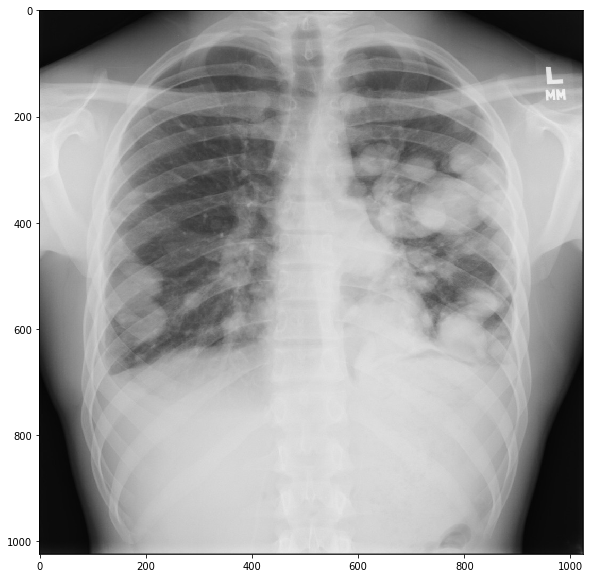

In [38]:
draw(parsed_not_normal['00322d4d-1c29-4943-afc9-b6754be640eb'])

In [39]:
parsed_normal = parse_data(df_detail[df_detail['class'] == 'Normal'])

In [40]:
parsed_normal

{'003d8fa0-6bf1-40ed-b54c-ac657f8495c5': {'dicom': 'data/stage_1_train_images/003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm',
  'label': 0,
  'boxes': []},
 '009482dc-3db5-48d4-8580-5c89c4f01334': {'dicom': 'data/stage_1_train_images/009482dc-3db5-48d4-8580-5c89c4f01334.dcm',
  'label': 0,
  'boxes': []},
 '009eb222-eabc-4150-8121-d5a6d06b8ebf': {'dicom': 'data/stage_1_train_images/009eb222-eabc-4150-8121-d5a6d06b8ebf.dcm',
  'label': 0,
  'boxes': []},
 '00a85be6-6eb0-421d-8acf-ff2dc0007e8a': {'dicom': 'data/stage_1_train_images/00a85be6-6eb0-421d-8acf-ff2dc0007e8a.dcm',
  'label': 0,
  'boxes': []},
 '00f87de5-5fe0-4921-93ea-914d7e683266': {'dicom': 'data/stage_1_train_images/00f87de5-5fe0-4921-93ea-914d7e683266.dcm',
  'label': 0,
  'boxes': []},
 '01027bc3-dc40-4165-a6c3-d6be2cb7ca34': {'dicom': 'data/stage_1_train_images/01027bc3-dc40-4165-a6c3-d6be2cb7ca34.dcm',
  'label': 0,
  'boxes': []},
 '017c7b5b-618e-4bc9-943c-04c6a988d992': {'dicom': 'data/stage_1_train_images/017c7b5b-618e-4b

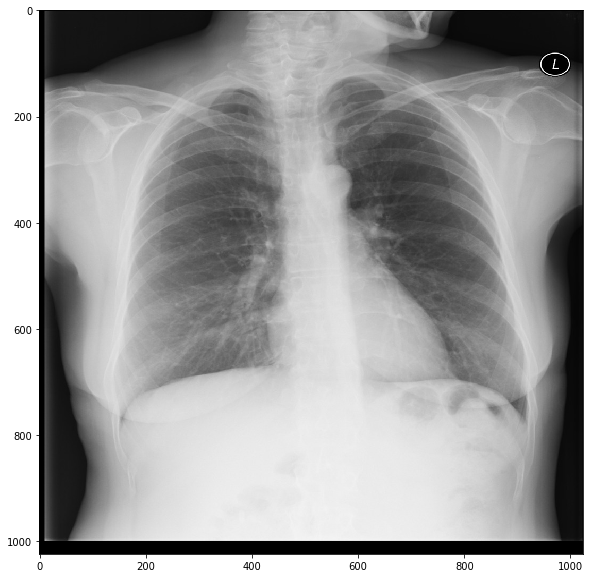

In [41]:
draw(parsed_normal['009eb222-eabc-4150-8121-d5a6d06b8ebf'])

In [42]:
d = pydicom.read_file(train_image_fps[0])

In [43]:
d

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [44]:
type(d)

pydicom.dataset.FileDataset

In [45]:
d[8,5]

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'

In [46]:
d.dir('Acc')

['AccessionNumber']

In [47]:
fields = d.dir()

In [48]:
fields

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition']

In [49]:
d.BodyPartExamined

'CHEST'

In [50]:
type(d.AccessionNumber)

str

In [51]:
data = [d.AccessionNumber,
d.BitsAllocated,
d.BitsStored,
d.BodyPartExamined,
d.Columns,
d.ConversionType,
d.HighBit,
d.InstanceNumber,
d.LossyImageCompression,
d.LossyImageCompressionMethod,
d.Modality,
d.PatientAge,
d.PatientBirthDate,
d.PatientID,
d.PatientName,
d.PatientOrientation,
d.PatientSex,
d.PhotometricInterpretation,
# d.PixelData,
d.PixelRepresentation,
d.PixelSpacing,
d.ReferringPhysicianName,
d.Rows,
d.SOPClassUID,
d.SOPInstanceUID,
d.SamplesPerPixel,
d.SeriesDescription,
d.SeriesInstanceUID,
d.SeriesNumber,
d.SpecificCharacterSet,
d.StudyDate,
d.StudyID,
d.StudyInstanceUID,
d.StudyTime,
d.ViewPosition]

In [52]:
data = np.array([[d.AccessionNumber,
d.BitsAllocated,
d.BitsStored,
d.BodyPartExamined,
d.Columns,
d.ConversionType,
d.HighBit,
d.InstanceNumber,
d.LossyImageCompression,
d.LossyImageCompressionMethod,
d.Modality,
d.PatientAge,
d.PatientBirthDate,
d.PatientID,
d.PatientName,
d.PatientOrientation,
d.PatientSex,
d.PhotometricInterpretation,
# d.PixelData,
d.PixelRepresentation,
d.PixelSpacing,
d.ReferringPhysicianName,
d.Rows,
d.SOPClassUID,
d.SOPInstanceUID,
d.SamplesPerPixel,
d.SeriesDescription,
d.SeriesInstanceUID,
d.SeriesNumber,
d.SpecificCharacterSet,
d.StudyDate,
d.StudyID,
d.StudyInstanceUID,
d.StudyTime,
d.ViewPosition]])

In [53]:
data

array([['', 8, 8, 'CHEST', 1024, 'WSD', 7, '1', '01', 'ISO_10918_1',
        'CR', '51', '', '0004cfab-14fd-4e49-80ba-63a80b6bddd6',
        '0004cfab-14fd-4e49-80ba-63a80b6bddd6', '', 'F', 'MONOCHROME2',
        0, ['0.14300000000000002', '0.14300000000000002'], '', 1024,
        '1.2.840.10008.5.1.4.1.1.7',
        '1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526', 1,
        'view: PA',
        '1.2.276.0.7230010.3.1.3.8323329.28530.1517874485.775524', '1',
        'ISO_IR 100', '19010101', '',
        '1.2.276.0.7230010.3.1.2.8323329.28530.1517874485.775525',
        '000000.00', 'PA']], dtype=object)

In [54]:
columns = d.dir()
columns.remove('PixelData')

In [55]:
columns

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition']

In [56]:
np.shape(columns)

(34,)

In [57]:
np.shape(data)

(1, 34)

In [58]:
train = pd.DataFrame(data, columns = columns)

In [59]:
train

,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,...,SamplesPerPixel,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,ViewPosition
0,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,000000.00,PA


In [60]:
d = pydicom.read_file(train_image_fps[0])

data = np.array([[d.AccessionNumber,
d.BitsAllocated,
d.BitsStored,
d.BodyPartExamined,
d.Columns,
d.ConversionType,
d.HighBit,
d.InstanceNumber,
d.LossyImageCompression,
d.LossyImageCompressionMethod,
d.Modality,
d.PatientAge,
d.PatientBirthDate,
d.PatientID,
d.PatientName,
d.PatientOrientation,
d.PatientSex,
d.PhotometricInterpretation,
# d.PixelData,
d.PixelRepresentation,
d.PixelSpacing,
d.ReferringPhysicianName,
d.Rows,
d.SOPClassUID,
d.SOPInstanceUID,
d.SamplesPerPixel,
d.SeriesDescription,
d.SeriesInstanceUID,
d.SeriesNumber,
d.SpecificCharacterSet,
d.StudyDate,
d.StudyID,
d.StudyInstanceUID,
d.StudyTime,
d.ViewPosition]])

columns = d.dir()
columns.remove('PixelData')

for image in train_image_fps[1:]:
    d = pydicom.read_file(image)
    
    image_meta = np.array([[d.AccessionNumber,
                        d.BitsAllocated,
                        d.BitsStored,
                        d.BodyPartExamined,
                        d.Columns,
                        d.ConversionType,
                        d.HighBit,
                        d.InstanceNumber,
                        d.LossyImageCompression,
                        d.LossyImageCompressionMethod,
                        d.Modality,
                        d.PatientAge,
                        d.PatientBirthDate,
                        d.PatientID,
                        d.PatientName,
                        d.PatientOrientation,
                        d.PatientSex,
                        d.PhotometricInterpretation,
                        # d.PixelData,
                        d.PixelRepresentation,
                        d.PixelSpacing,
                        d.ReferringPhysicianName,
                        d.Rows,
                        d.SOPClassUID,
                        d.SOPInstanceUID,
                        d.SamplesPerPixel,
                        d.SeriesDescription,
                        d.SeriesInstanceUID,
                        d.SeriesNumber,
                        d.SpecificCharacterSet,
                        d.StudyDate,
                        d.StudyID,
                        d.StudyInstanceUID,
                        d.StudyTime,
                        d.ViewPosition]])
    
    data = np.append(data, image_meta, axis = 0)
    
train = pd.DataFrame(data, columns = columns)

In [61]:
data.shape

(25684, 34)

In [62]:
data[:3]

array([['', 8, 8, 'CHEST', 1024, 'WSD', 7, '1', '01', 'ISO_10918_1',
        'CR', '51', '', '0004cfab-14fd-4e49-80ba-63a80b6bddd6',
        '0004cfab-14fd-4e49-80ba-63a80b6bddd6', '', 'F', 'MONOCHROME2',
        0, ['0.14300000000000002', '0.14300000000000002'], '', 1024,
        '1.2.840.10008.5.1.4.1.1.7',
        '1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526', 1,
        'view: PA',
        '1.2.276.0.7230010.3.1.3.8323329.28530.1517874485.775524', '1',
        'ISO_IR 100', '19010101', '',
        '1.2.276.0.7230010.3.1.2.8323329.28530.1517874485.775525',
        '000000.00', 'PA'],
       ['', 8, 8, 'CHEST', 1024, 'WSD', 7, '1', '01', 'ISO_10918_1',
        'CR', '48', '', '00313ee0-9eaa-42f4-b0ab-c148ed3241cd',
        '00313ee0-9eaa-42f4-b0ab-c148ed3241cd', '', 'F', 'MONOCHROME2',
        0, ['0.19431099999999998', '0.19431099999999998'], '', 1024,
        '1.2.840.10008.5.1.4.1.1.7',
        '1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011', 1,
        'view:

In [63]:
train.head(20)

,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,...,SamplesPerPixel,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,ViewPosition
0,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,000000.00,PA
1,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.26024.15178744...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.26024.15178744...,000000.00,PA
2,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.11252.15178743...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.11252.15178743...,000000.00,AP
3,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.2293.151787429...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.2293.151787429...,000000.00,PA
4,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.6379.151787432...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.6379.151787432...,000000.00,AP
5,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.18028.15178744...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.18028.15178744...,000000.00,AP
6,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.27915.15178744...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.27915.15178744...,000000.00,PA
7,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.4188.151787430...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.4188.151787430...,000000.00,PA
8,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.17654.15178744...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.17654.15178744...,000000.00,PA
9,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.5513.151787431...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.5513.151787431...,000000.00,PA


In [64]:
train.columns

Index(['AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined',
       'Columns', 'ConversionType', 'HighBit', 'InstanceNumber',
       'LossyImageCompression', 'LossyImageCompressionMethod', 'Modality',
       'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientName',
       'PatientOrientation', 'PatientSex', 'PhotometricInterpretation',
       'PixelRepresentation', 'PixelSpacing', 'ReferringPhysicianName', 'Rows',
       'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SeriesDescription',
       'SeriesInstanceUID', 'SeriesNumber', 'SpecificCharacterSet',
       'StudyDate', 'StudyID', 'StudyInstanceUID', 'StudyTime',
       'ViewPosition'],
      dtype='object')

In [65]:
train[['PatientAge', 'PatientBirthDate', 'PatientID', 'PatientName',
       'StudyDate', 'StudyID', 'StudyInstanceUID', 'StudyTime']].head(20)

,PatientAge,PatientBirthDate,PatientID,PatientName,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,51,,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0004cfab-14fd-4e49-80ba-63a80b6bddd6,19010101,,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,000000.00
1,48,,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,19010101,,1.2.276.0.7230010.3.1.2.8323329.26024.15178744...,000000.00
2,19,,00322d4d-1c29-4943-afc9-b6754be640eb,00322d4d-1c29-4943-afc9-b6754be640eb,19010101,,1.2.276.0.7230010.3.1.2.8323329.11252.15178743...,000000.00
3,28,,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,19010101,,1.2.276.0.7230010.3.1.2.8323329.2293.151787429...,000000.00
4,32,,00436515-870c-4b36-a041-de91049b9ab4,00436515-870c-4b36-a041-de91049b9ab4,19010101,,1.2.276.0.7230010.3.1.2.8323329.6379.151787432...,000000.00
5,54,,00569f44-917d-4c86-a842-81832af98c30,00569f44-917d-4c86-a842-81832af98c30,19010101,,1.2.276.0.7230010.3.1.2.8323329.18028.15178744...,000000.00
6,78,,006cec2e-6ce2-4549-bffa-eadfcd1e9970,006cec2e-6ce2-4549-bffa-eadfcd1e9970,19010101,,1.2.276.0.7230010.3.1.2.8323329.27915.15178744...,000000.00
7,75,,00704310-78a8-4b38-8475-49f4573b2dbb,00704310-78a8-4b38-8475-49f4573b2dbb,19010101,,1.2.276.0.7230010.3.1.2.8323329.4188.151787430...,000000.00
8,59,,008c19e8-a820-403a-930a-bc74a4053664,008c19e8-a820-403a-930a-bc74a4053664,19010101,,1.2.276.0.7230010.3.1.2.8323329.17654.15178744...,000000.00
9,63,,009482dc-3db5-48d4-8580-5c89c4f01334,009482dc-3db5-48d4-8580-5c89c4f01334,19010101,,1.2.276.0.7230010.3.1.2.8323329.5513.151787431...,000000.00


In [66]:
train = train.rename(columns = {'PatientID': 'patientId'})

In [67]:
train.head()

,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,...,SamplesPerPixel,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,ViewPosition
0,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,000000.00,PA
1,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.26024.15178744...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.26024.15178744...,000000.00,PA
2,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.11252.15178743...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.11252.15178743...,000000.00,AP
3,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.2293.151787429...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.2293.151787429...,000000.00,PA
4,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.6379.151787432...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.6379.151787432...,000000.00,AP


In [68]:
train = train.merge(df_detail, on = 'patientId')

In [69]:
train.to_csv('data/train.csv')

In [70]:
def get_dicom_fps(dicom_dir):
    dicom_fps = glob.glob(dicom_dir+'/'+'*.dcm')
    return list(set(dicom_fps))

def parse_dataset(dicom_dir, anns): 
    image_fps = get_dicom_fps(dicom_dir)
    image_annotations = {fp: [] for fp in image_fps}
    for index, row in anns.iterrows(): 
        fp = os.path.join(dicom_dir, row['patientId']+'.dcm')
        image_annotations[fp].append(row)
    return image_fps, image_annotations 

In [71]:
test_image_fps = get_dicom_fps(test_dicom_dir)

In [72]:
d = pydicom.read_file(test_image_fps[0])

data = np.array([[d.AccessionNumber,
d.BitsAllocated,
d.BitsStored,
d.BodyPartExamined,
d.Columns,
d.ConversionType,
d.HighBit,
d.InstanceNumber,
d.LossyImageCompression,
d.LossyImageCompressionMethod,
d.Modality,
d.PatientAge,
d.PatientBirthDate,
d.PatientID,
d.PatientName,
d.PatientOrientation,
d.PatientSex,
d.PhotometricInterpretation,
# d.PixelData,
d.PixelRepresentation,
d.PixelSpacing,
d.ReferringPhysicianName,
d.Rows,
d.SOPClassUID,
d.SOPInstanceUID,
d.SamplesPerPixel,
d.SeriesDescription,
d.SeriesInstanceUID,
d.SeriesNumber,
d.SpecificCharacterSet,
d.StudyDate,
d.StudyID,
d.StudyInstanceUID,
d.StudyTime,
d.ViewPosition]])

columns = d.dir()
columns.remove('PixelData')

for image in test_image_fps[1:]:
    d = pydicom.read_file(image)
    
    image_meta = np.array([[d.AccessionNumber,
                        d.BitsAllocated,
                        d.BitsStored,
                        d.BodyPartExamined,
                        d.Columns,
                        d.ConversionType,
                        d.HighBit,
                        d.InstanceNumber,
                        d.LossyImageCompression,
                        d.LossyImageCompressionMethod,
                        d.Modality,
                        d.PatientAge,
                        d.PatientBirthDate,
                        d.PatientID,
                        d.PatientName,
                        d.PatientOrientation,
                        d.PatientSex,
                        d.PhotometricInterpretation,
                        # d.PixelData,
                        d.PixelRepresentation,
                        d.PixelSpacing,
                        d.ReferringPhysicianName,
                        d.Rows,
                        d.SOPClassUID,
                        d.SOPInstanceUID,
                        d.SamplesPerPixel,
                        d.SeriesDescription,
                        d.SeriesInstanceUID,
                        d.SeriesNumber,
                        d.SpecificCharacterSet,
                        d.StudyDate,
                        d.StudyID,
                        d.StudyInstanceUID,
                        d.StudyTime,
                        d.ViewPosition]])
    
    data = np.append(data, image_meta, axis = 0)
    
test = pd.DataFrame(data, columns = columns)

test = test.rename(columns = {'PatientID':'patientId'})

test.to_csv('data/test.csv')